**Fire Data Set Data exploration and visualization**

Set Up

In [1]:
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the **data**

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/fire/"

In [5]:
fire_PATH = os.path.join("datasets", "fire")
fire_URL ="https://github.com/Gowresh-HW/DMLL-F21DL/blob/main/Dataset/fire_archive.csv"
def fetch_fire_data(fire_url=fire_URL, fire_path=fire_PATH):
    os.makedirs(fire_path, exist_ok=True)
    tgz_path = os.path.join(fire_path, "fire.csv")
    urllib.request.urlretrieve(fire_url, tgz_path)

In [6]:
fetch_fire_data()
# calling the function fetch_fire_data, (defined above) creates a datasets/fire directory in the workspace,
# extracts the fire.csv file from it in this directory 

load_fire_data function loads the fire.csv into a panda dataframe

In [7]:
def load_fire_data(fire_path=fire_PATH):
    csv_path = os.path.join(fire_path, "fire.csv")
    return pd.read_csv(csv_path)

In [10]:
fire = load_fire_data() # "fire" now becomes a pandas DataFrame object containing all the data
fire.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .
#A1: There are 15 attributes in the dataset. The latitude and longitude attributes has float value and is of type, ratio. 
#    The brightness attribute carries a float value and is of the type, ordinal.
#    Scan and Track attributes refers to float values and is of type, ratio.
#    acq_date contains string value and is of type, interval while acq_time consists of values in int and is of type, numeric.
#    Satellite  and instrument attribute refers to string value and is of type, nominal.
#    Confidence contains values in int and is of type nominal.This is our class attribute(Values greater than 60% or 70% ususally
#    mean the hotspot is actually a firespot). 
#    Version attribute is of type nominal and caontains value in float.
#    bright_t31 is of type ordinal and contains value in float.
#    frp is represented in float and belongs to type ratio. 
#    Daynight attribute contains value in string and is of type nominal.
#    type attribute is represented in int and can be of type nominal.

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,NaN,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,01/08/2019,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,01/08/2019,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,NaN,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,01/08/2019,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [11]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
fire.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 
#A2: There are 5 missing values in the dataset under the attribute, acq_time. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36006 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [12]:
print(fire["daynight"].value_counts())
print(fire["instrument"].value_counts())
print(fire["satellite"].value_counts())
# Q3 What does the value_count() method display?
# A3: The value_count() displays the number of values in each category of an attribute across the dataset. 

D    28203
N     7808
Name: daynight, dtype: int64
MODIS    36011
Name: instrument, dtype: int64
Aqua     20541
Terra    15470
Name: satellite, dtype: int64


In [13]:
#This method shows a statistical summary of the numerical attributes 
fire.describe() 

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


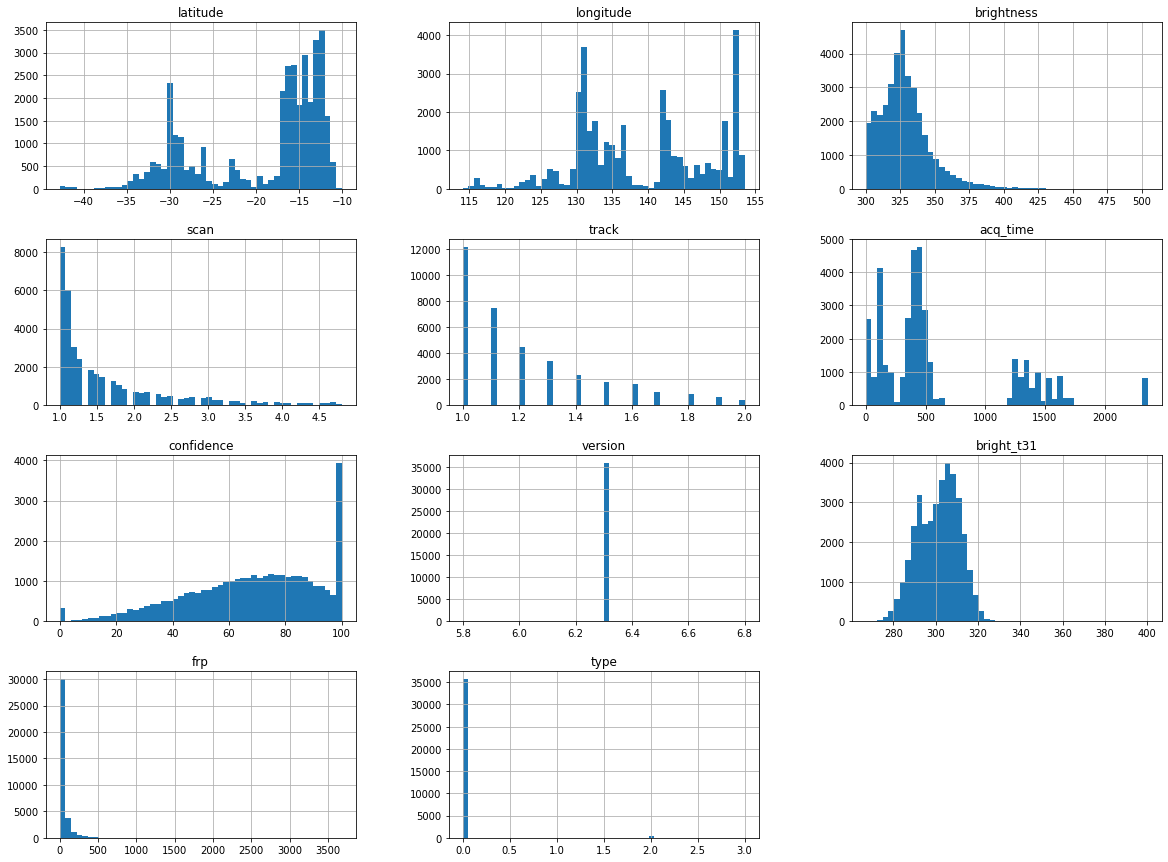

In [14]:
#To plot a histogram for each numerical attribute
fire.hist(bins=50, figsize=(20,15))
plt.show()
# Q4 List down the main observations you noted from the statistical summary and the histogram
# the histogram of attribute confidence and frp show the presence of outliers.
# The attribute version and type has only one value throughout the dataset which indicate that dropping these attributes wouldn't affect the dataset.

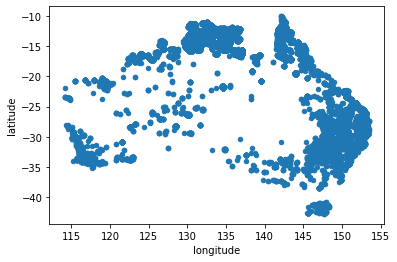

In [15]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
# A5: The first plot does not help us in finding any particular pattern. The second plot is comparitively better
#     in representing the density of areas where the measurement were taken. The third plot is more indicative
#     as we can understand the different confidence levels of hotspot across the areas.
fire.plot(kind="scatter", x="longitude", y="latitude")

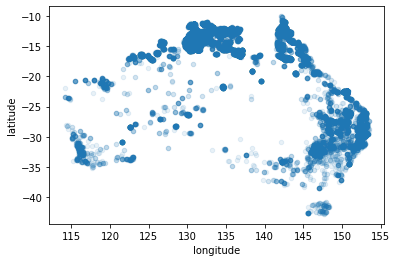

In [18]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

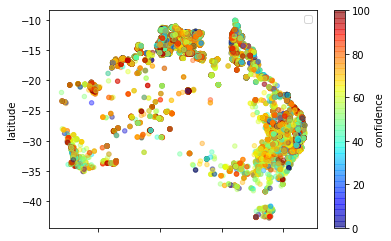

In [19]:
fire.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    #s=fire["brightness"]/100, label="brightness", figsize=(10,7),
    c="confidence", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots the confidence of the hotspots with red being high confidence and blue being low confidence. 

In [20]:
# Now we will look at the correlation of all the attributes with the expected class attribute (confidence)
corr_matrix = fire.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [21]:
corr_matrix["confidence"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.confidence)?
# Does that make sense?
# A6: The most correlated attributes with the target attribute confidence are the brightness and the frp such that
#     they have strong positive correlation. The scan, track and acq_time attributes have negative correlation with the confidence attribute. This may 
#     be due to the reason that the more amount of time the satellite spends on a particular region of interest,
#     the less likely it can be that that region has low confidence of hotspot.

confidence    1.000000
brightness    0.614691
frp           0.355388
bright_t31    0.238506
latitude      0.020656
longitude    -0.035529
type         -0.041632
acq_time     -0.070012
scan         -0.103808
track        -0.105949
version            NaN
Name: confidence, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f817ec258d0>,
      dtype=object)

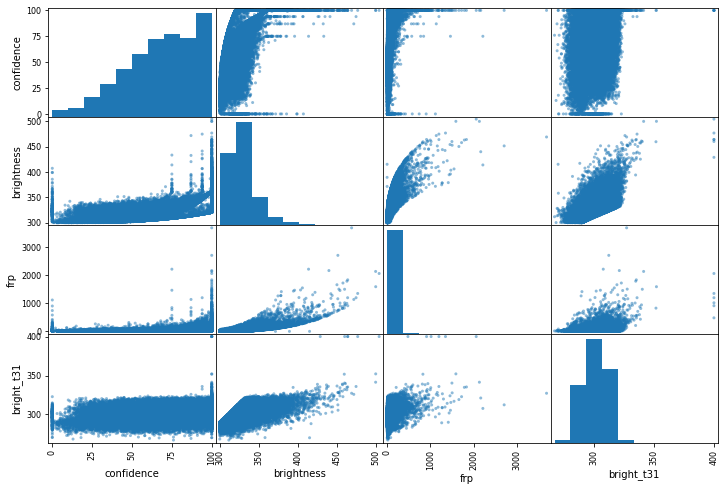

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["confidence", "brightness", "frp",
              "bright_t31"]
scatter_matrix(fire[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(300.0, 500.0, 0.0, 100.0)

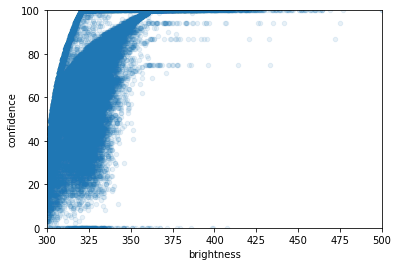

In [23]:
# let’s zoom in on the correlation scatterplot "confidence & the brightness,"
fire.plot(kind="scatter", x="brightness", y="confidence",
             alpha=0.1)
plt.axis([300, 500, 0, 100])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?
#A7:  Due to the upward trend, it shows that the correlation is very strong. There are straight  
#     horizontal lines at around 100, 90, 85, 75 and even around 0. This needs to be considered in order to prevent
#     data quirks.

Scikit-Learn solution (optional)

In [24]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [25]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without cat. data
fire_num = fire.drop(["acq_date","satellite", "instrument", "version", "daynight"] ,axis=1) 

In [26]:
imputer.fit(fire_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable.

  

In [27]:
imputer.statistics_

array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [28]:
fire_num.median().values #Check that this is the same as manually computing the median of each attribute

array([-15.7065, 136.7385, 326.4   ,   1.3   ,   1.1   , 424.    ,
        70.    , 302.4   ,  25.8   ,   0.    ])

In [29]:
X = imputer.transform(fire_num) # transform the data set

In [30]:
ire_tr = pd.DataFrame(X, columns=fire_num.columns,
                          index=fire_num.index) # load the new tranformed data set into the pandas frame fire_tr

Handling Text and Categorical Attributes

In [31]:
fire_cat = fire[["daynight", "satellite"]]
fire_cat.head(10)  # look at the values for the first 10 instances 

,daynight,satellite
0,D,Terra
1,D,Terra
2,D,Terra
3,D,Terra
4,D,Terra
5,D,Terra
6,D,Terra
7,D,Terra
8,D,Terra
9,D,Terra


In [32]:
fire_cat.tail(10)
# look at the values for the last 10 instances

,daynight,satellite
36001,N,Aqua
36002,N,Aqua
36003,N,Aqua
36004,N,Aqua
36005,N,Aqua
36006,N,Aqua
36007,N,Aqua
36008,N,Aqua
36009,N,Aqua
36010,N,Aqua


In [34]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
fire_cat_encoded = ordinal_encoder.fit_transform(fire_cat)
fire_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?
# A15: There may be a possibility that nearby values are more similar than distant values.However as far as this
# dataset is considered the categorical values have only binary classification. 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [35]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute

[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]

In [36]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

<36011x4 sparse matrix of type '<class 'numpy.float64'>'
	with 72022 stored elements in Compressed Sparse Row format>

In [37]:
type(fire_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

scipy.sparse.csr.csr_matrix

In [38]:
fire_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [39]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
fire_cat_1hot = cat_encoder.fit_transform(fire_cat)
fire_cat_1hot

array([[1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.]])

In [40]:
cat_encoder.categories_         # Get a list of categories

[array(['D', 'N'], dtype=object), array(['Aqua', 'Terra'], dtype=object)]